# Avocado project:-

In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from scipy.stats import zscore


# Loading Dataset:-

In [3]:
df=pd.read_csv(r'C:\Users\sony\Downloads\avocado.csv\avocado.csv')

In [38]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [39]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# EDA:-

In [6]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [7]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [66]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


As seen in this dataset there is oneUnnamed: 0 column which does not play any important role for prediction in the price of avocado, so I am dropping that column.

In [67]:
df.shape

(18249, 13)

In [68]:
print('This dataset has {} observations with {} features.'.format(df.shape[0], df.shape[1]))

This dataset has 18249 observations with 13 features.


In [69]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [70]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [71]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

Here we can check most of the column are of same data type that is float, type and region is of object data type

In [13]:
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [14]:
df.isnull().values.any()

False

we can see there is no null or missing values are present in this dataset

<AxesSubplot:>

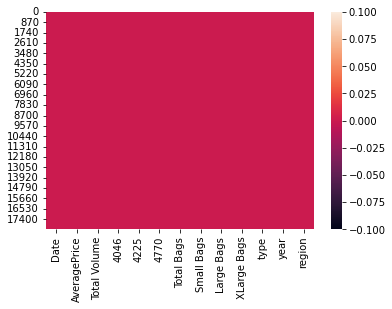

In [44]:
sns.heatmap(df.isnull())

 Here I am checking the null values with the heatmap, as find there are no null values in the data set because the red color is distributed equally correspond to each column.

In [16]:
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

from above we can see that year 2017 is too expensive year where avocado price is higher as compared to other years and 2016,2015,2018 repectivly

In [45]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# Data Visualization:-


for this visualization part we have to plot different graphs using different columns and try to visualize the data using matplotlib and seaborn library.

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

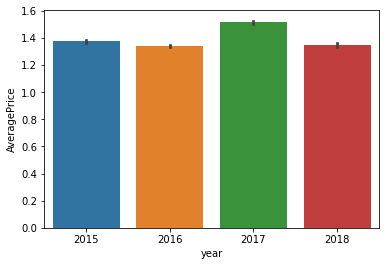

In [18]:
#checking yaer and price ratio that which year had maximum avg price
sns.barplot(x='year',y='AveragePrice',data=df)

2017 is that year where the price is maximum as compared to other year, and there is less difference among rest of the year.

In [19]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

<AxesSubplot:xlabel='AveragePrice'>

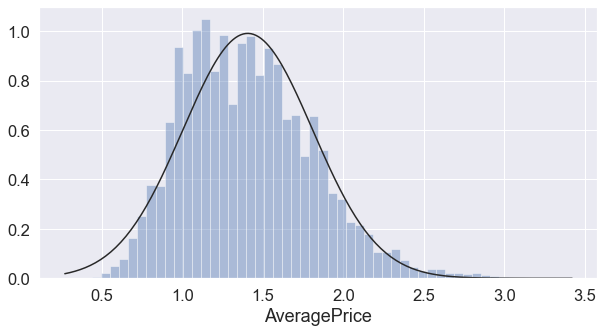

In [91]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

Average Price distribution shows that for most cases price of avocado is between 1.1, 1.4.

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

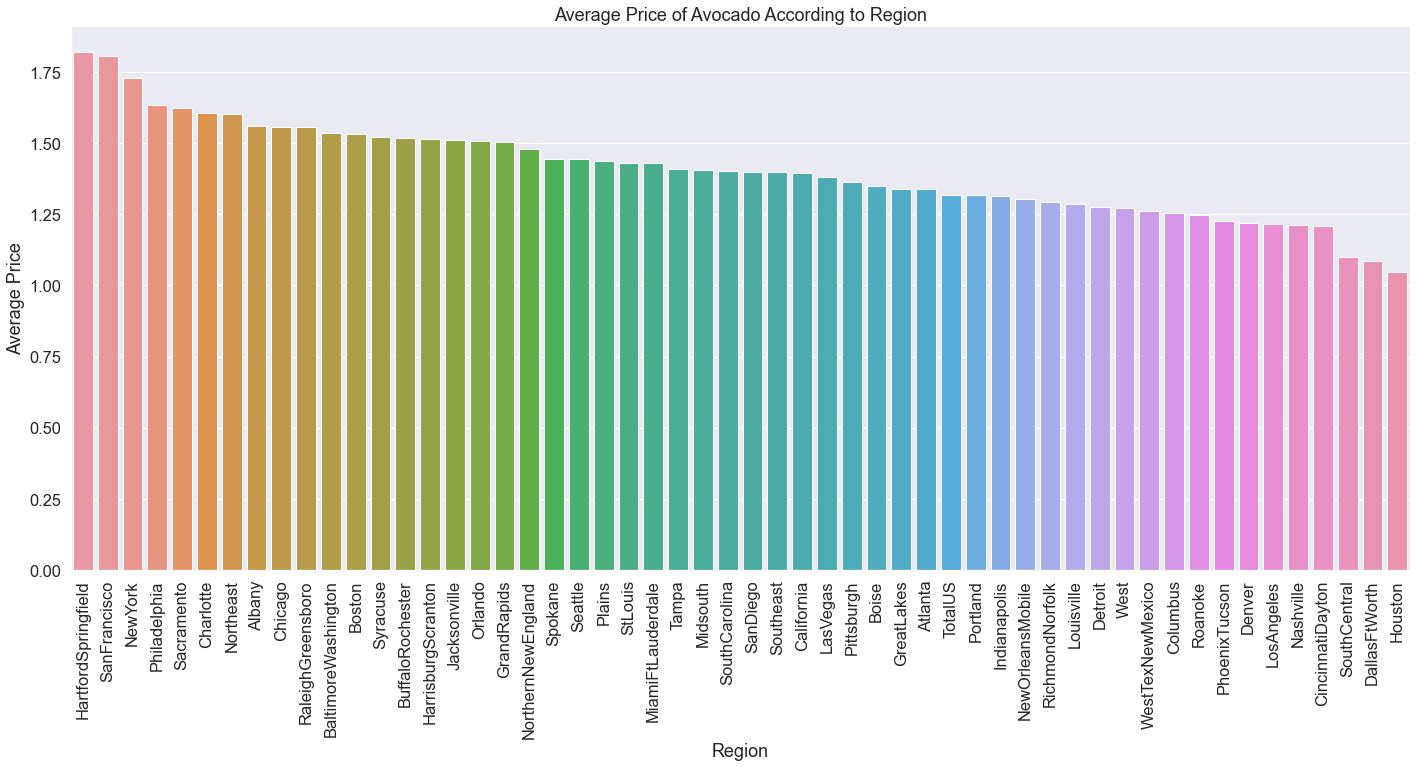

In [92]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

Text(0.5, 1.0, 'Average of Total Volume According to Region')

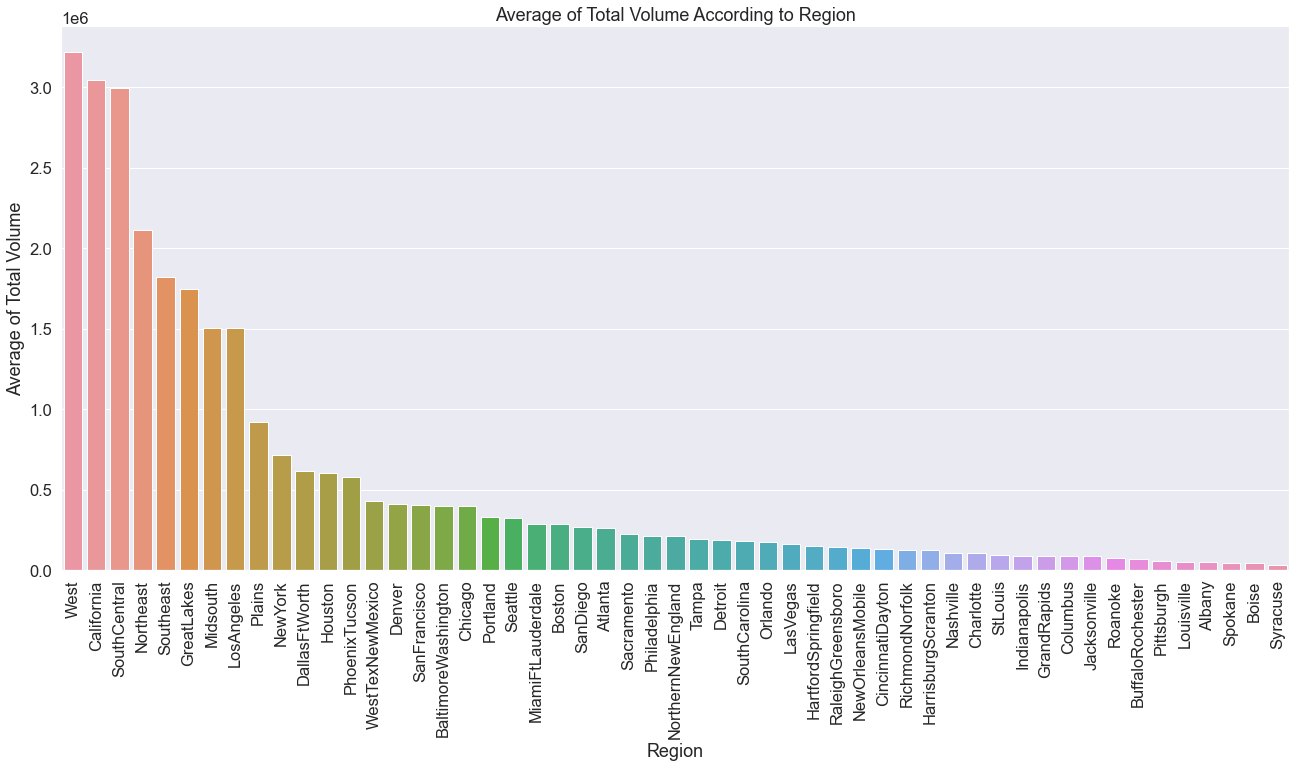

In [93]:
filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

<AxesSubplot:xlabel='AveragePrice', ylabel='count'>

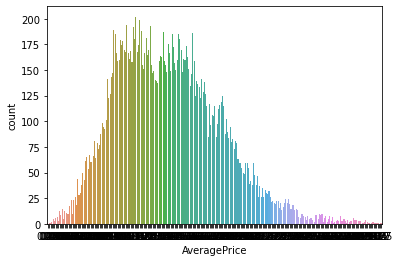

In [20]:
sns.countplot(df['AveragePrice'])

Text(0.5, 1.0, 'Average Price')

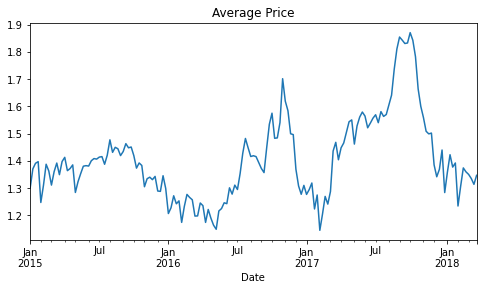

In [73]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(8,4))
byDate['AveragePrice'].plot()
plt.title('Average Price')

as we can clearly see in between jul-oct the price is too expensive

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

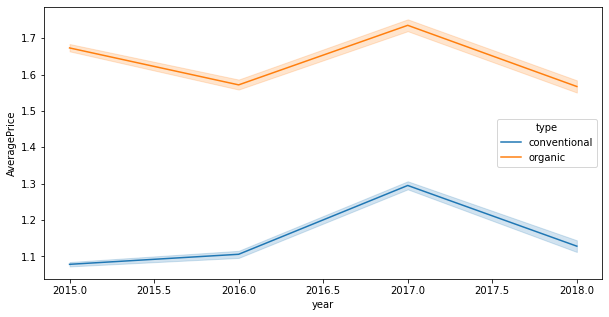

In [46]:
plt.figure(figsize=(10,5))
sns.lineplot(x='year',y='AveragePrice',hue='type',data=df)

we can see there is a hike in price in-between mid of 2016 to mid of 2017 in both the cases.

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

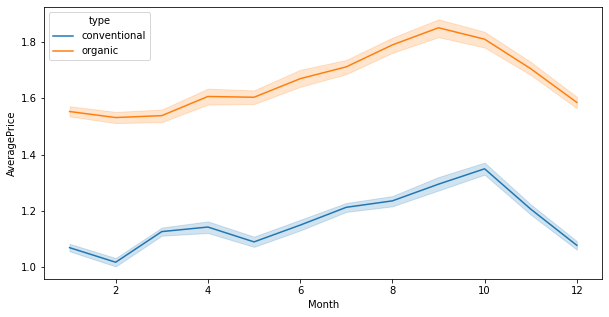

In [76]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Month',y='AveragePrice',hue='type',data=df)

we can see there is a hike in price in-between 8-10th months in both the cases.

# Histogram Plotting:-

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

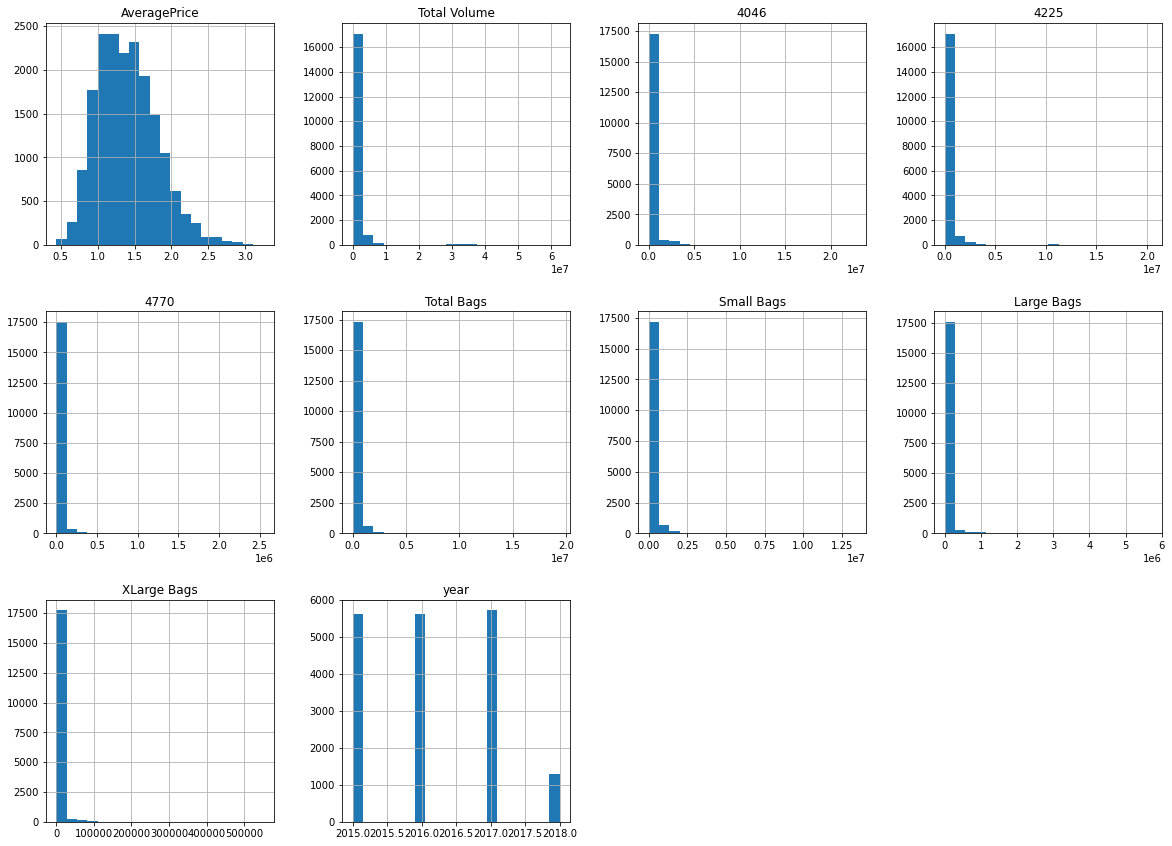

In [47]:
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=20)
# we can take any bin size ,layout also

# Checking Outliers:-

AveragePrice        AxesSubplot(0.125,0.71587;0.168478x0.16413)
Total Volume     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
4046             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
4225             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
4770               AxesSubplot(0.125,0.518913;0.168478x0.16413)
Total Bags      AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Small Bags      AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Large Bags      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
XLarge Bags        AxesSubplot(0.125,0.321957;0.168478x0.16413)
year            AxesSubplot(0.327174,0.321957;0.168478x0.16413)
dtype: object

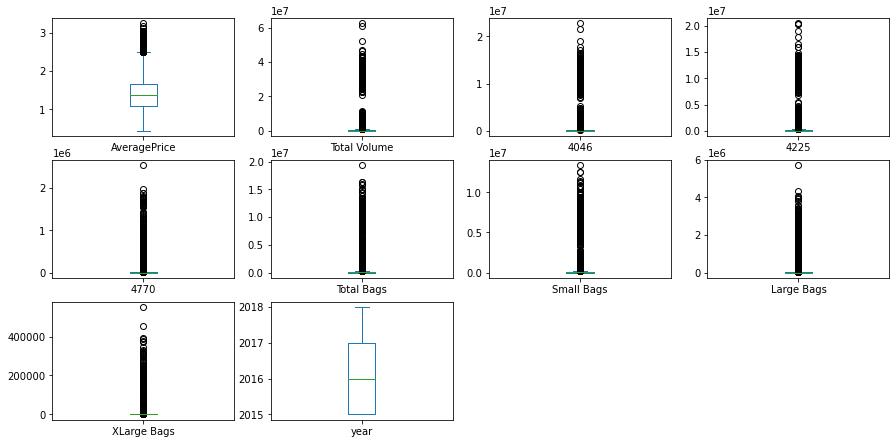

In [48]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(15,10))

In [52]:
new_df=df

In [53]:
new_df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [86]:
new_df=new_df.drop(['year'],axis=1)

In [87]:
new_df=new_df.drop(['region'],axis=1)

In [88]:
new_df=new_df.drop(['type'],axis=1)

In [89]:
new_df=new_df.drop(['Date'],axis=1)

In [58]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(new_df))
print(z)

       AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          0.188689      0.227716  0.230816  0.199902  0.212091    0.234170   
1          0.139020      0.230427  0.231103  0.208054  0.211997    0.233350   
2          1.182069      0.212085  0.231007  0.154478  0.211325    0.234730   
3          0.809551      0.223444  0.230741  0.185350  0.211864    0.237096   
4          0.312861      0.231538  0.230891  0.208719  0.211834    0.236718   
...             ...           ...       ...       ...       ...         ...   
18244      0.556347      0.241373  0.230017  0.243857  0.212540    0.229301   
18245      0.755023      0.242296  0.230693  0.242277  0.212540    0.233594   
18246      1.152375      0.242331  0.230693  0.243090  0.205766    0.233463   
18247      1.301382      0.241625  0.230428  0.242651  0.205774    0.231866   
18248      0.531512      0.241253  0.229347  0.243170  0.210450    0.230807   

       Small Bags  Large Bags  XLarge Bags  
0     

In [59]:
z.shape

(18249, 9)

In [60]:
threshold=3
print(np.where(z<3))

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([0, 1, 2, ..., 6, 7, 8], dtype=int64))


In [61]:
z.iloc[4]

AveragePrice    0.312861
Total Volume    0.231538
4046            0.230891
4225            0.208719
4770            0.211834
Total Bags      0.236718
Small Bags      0.236154
Large Bags      0.221924
XLarge Bags     0.175580
Name: 4, dtype: float64

In [62]:
new_df=df[(z<3).all(axis=1)]

In [63]:
print('Old dataframe',df.shape)
print('New dataframe',new_df.shape)
print('Total_dropped_rows',df.shape[0]-new_df.shape[0])

Old dataframe (18249, 13)
New dataframe (17651, 13)
Total_dropped_rows 598


So, I first find the zscore value and then I decide to make one threshold value as 3 which is standard of industry recommend value and then I remove all the outliers which zscore value is greater than 3.

After, removing the outlier’s final there are 17651 and 13 column presents in the data set.

# % of data loss:-

In [64]:
loss_percent=(18249-17651)/18249*100
print(loss_percent,'%')

3.276891884486821 %


3.27% off dat are loss after removing outliers

# Correlation Matrix:-

Correlation Matrix is basically a covariance matrix. A summary measure called the correlation describes the strength of the linear association. Correlation summarizes the strength and direction of the linear (straight-line) association between two quantitative variables. Denoted by r, it takes values between -1 and +1.

it is mainly divided into 2 parts:

- Positive correlated value

- Negative correlated value

The most the value is positive means that column is much co related.
I am using seaborn heatmap to plot the correlated matrix 

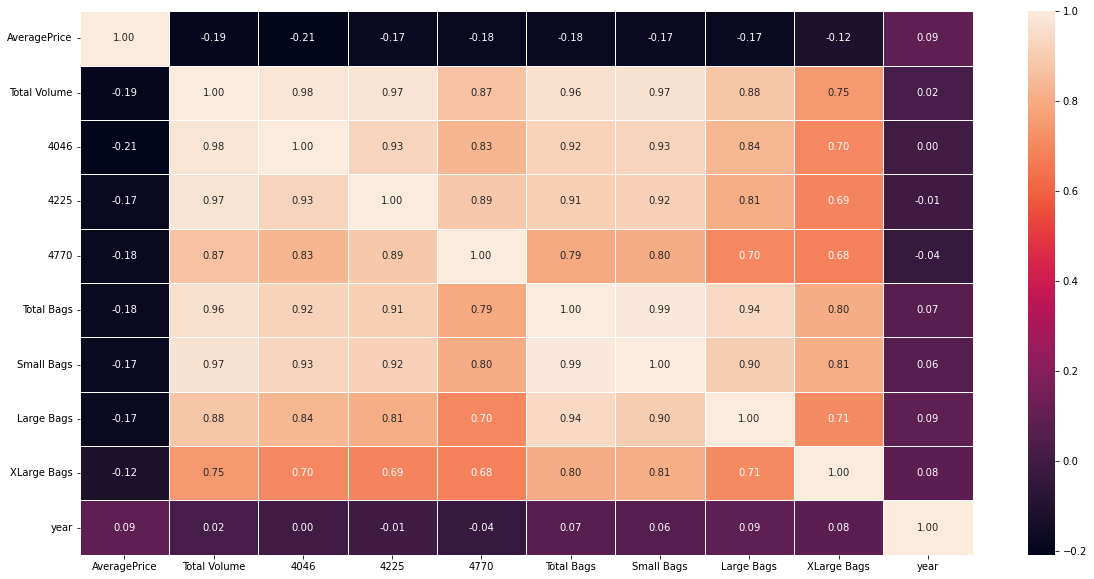

In [65]:
df_cor=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(df_cor,annot=True,linewidth=0.5,linecolor='white',fmt='.2f')
plt.show()

From this correlation visualization, we will find which features are correlated with eachother

In [90]:
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(new_df)
print(scaled)

[[4.10138249e-01 7.67147114e-03 2.53738579e-04 ... 3.66288003e-03
  1.19329865e-04 0.00000000e+00]
 [4.19354839e-01 6.55222091e-03 1.65027730e-04 ... 4.00536422e-03
  1.24755695e-04 0.00000000e+00]
 [2.25806452e-01 1.41269712e-02 1.94500114e-04 ... 3.42386698e-03
  1.31985869e-04 0.00000000e+00]
 ...
 [6.58986175e-01 1.63615326e-03 2.91718354e-04 ... 3.98140799e-03
  5.41431272e-05 0.00000000e+00]
 [6.86635945e-01 1.92775069e-03 3.73882232e-04 ... 4.64885304e-03
  6.39838421e-05 0.00000000e+00]
 [5.43778802e-01 2.08133782e-03 7.08485084e-04 ... 5.10379568e-03
  3.32843947e-05 0.00000000e+00]]


# Model building:-

In [79]:
df['region'].nunique()

54

In [80]:
df['type'].nunique()

2

-As we can see we have 54 regions and 2 unique types, so it's going to be easy to to transform the type feature to dummies, but for the region its going to be a bit complex, so I decided to drop the entire column.

-now lets drop the Date Feature as well because I already have 3 other columns for the Year, Month and Day.

In [94]:
df2=pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)

In [95]:
df2.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0


In [97]:
df2.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14,1
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,2018,1,7,1


# Model selection/predictions:-

# For average price:-

-Now our data are ready! lets apply our model which is going to be the Linear Regression because our Target variable 'AveragePrice' is continuous.

In [98]:
X=df2.iloc[:,1:14]
y=df2['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [106]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [107]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.23274402465920246
MSE: 0.09121264451984236
RMSE: 0.3020143117798267


--The RMSE is low so we can say that we do have a good model.

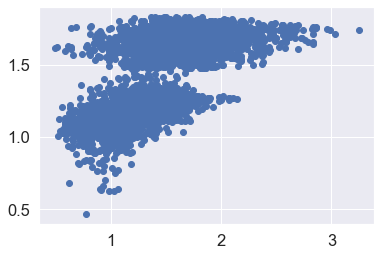

In [108]:
plt.scatter(x=y_test,y=pred)

In [ ]:
As we can see that we don't have a straight line...so i have to test it with some other models as well...

In [101]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

In [102]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.13483234714003944
MSE: 0.04271290817444664
RMSE: 0.20667101435481136


Text(0, 0.5, 'Predicted Y')

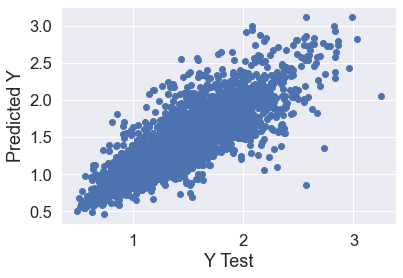

In [104]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [109]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [110]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.10175779092702168
MSE: 0.021536464518956824
RMSE: 0.14675307328624101


Text(0, 0.5, 'Predicted Y')

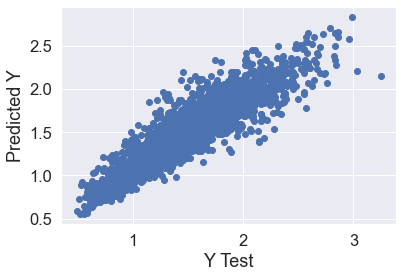

In [111]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

-As we can see the RMSE is lower than the two previous models, so the RandomForest Regressor is the best model in this case.

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

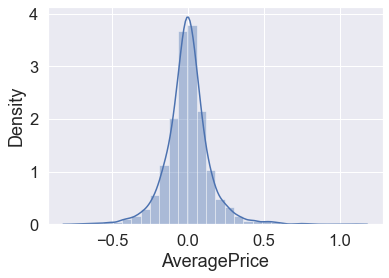

In [112]:
sns.distplot((y_test-pred),bins=30)

Here that our residuals looked to be normally distributed and that's really a good sign which means that our model was a correct choice for the data.

# Lets see Actual Vs Predicted sample.

,Y Test,Pred
8604,0.82,0.9471
2608,0.97,1.0103
14581,1.44,1.3820
4254,0.97,0.9155
16588,1.45,1.4457


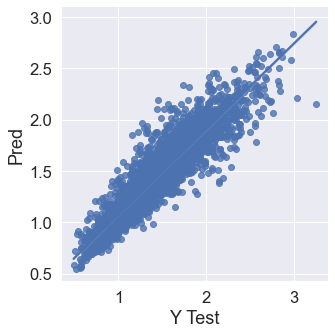

In [113]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

# Prediction with Region:-

In [128]:
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [147]:
x_c=df.drop(columns=['region','Date','type','year'])
y_c=df[['region']]

In [148]:
print(x_c.shape)
print(y_c.shape)

(18249, 11)
(18249, 1)


In [149]:
sc=StandardScaler()

In [150]:
sc.fit_transform(x_c)
x_c=pd.DataFrame(x_c,columns=x_c.columns)

In [157]:
model=[DecisionTreeClassifier(),KNeighborsClassifier()]
max_accuracy_score=0
for r_state in range(40,90):
    train_xc,test_xc,train_yc,test_yc=train_test_split(x_c,y_c,random_state=r_state,test_size=0.30)
    for i_c in model:
        i_c.fit(train_xc,train_yc)
        pre_c=i_c.predict(test_xc)
        ac_score=accuracy_score(test_yc,pre_c)
        print('Accuracy score corresponding to random state :- ',r_state ,'is',ac_score)
        if ac_score>max_accuracy_score:
            max_accuracy_score=ac_score
            final_state=r_state
            final_model=i_c
print()
print()
print()
print()
print('Max Accuracy score corresponding to random state :- ',r_state, 'is',max_accuracy_score ,'And model is',final_model)    

Accuracy score corresponding to random state :-  40 is 0.7727853881278539
Accuracy score corresponding to random state :-  40 is 0.6491324200913242
Accuracy score corresponding to random state :-  41 is 0.7643835616438356
Accuracy score corresponding to random state :-  41 is 0.6520547945205479
Accuracy score corresponding to random state :-  42 is 0.7738812785388128
Accuracy score corresponding to random state :-  42 is 0.6518721461187215
Accuracy score corresponding to random state :-  43 is 0.765662100456621
Accuracy score corresponding to random state :-  43 is 0.645662100456621
Accuracy score corresponding to random state :-  44 is 0.7598173515981735
Accuracy score corresponding to random state :-  44 is 0.6578995433789955
Accuracy score corresponding to random state :-  45 is 0.7691324200913242
Accuracy score corresponding to random state :-  45 is 0.6553424657534247
Accuracy score corresponding to random state :-  46 is 0.7605479452054794
Accuracy score corresponding to random s

Here we can see accuracy score is very good in DecisionTree. which is 89%

In [169]:
train_xc,test_xc,train_yc,test_yc=train_test_split(x_c,y_c,random_state=65,test_size=0.25)
knc=KNeighborsClassifier()
parameters={'n_neighbors': range(1,30)}
gridsearch=GridSearchCV(knc,parameters)
gridsearch.fit(train_xc,train_yc)
gridsearch.best_params_

{'n_neighbors': 1}

In [170]:
knc=KNeighborsClassifier(n_neighbors=1)
knc.fit(train_xc,train_yc)
predc=knc.predict(test_xc)
acu_score=accuracy_score(test_yc,predc)
print('Accuracy score = ',acu_score*100)

Accuracy score =  68.41989918912996


In [174]:
score=cross_val_score(knc,x_c,y_c,cv=200,scoring='accuracy').mean()
print('Cross val score :- ',score*100)
print('Mean score      :- ',score*100)

Cross val score :-  67.46088150979455
Mean score      :-  67.46088150979455



 -Here the random state that is occurring is 89 which provide the best accuracy score for the model which is 89%.

-Also, by using the GridSeachCV I am able to find the best param and then find the best accuracy score that is 89% with decision tree classifier

# Roc Curve:-

In [185]:
from sklearn.metrics import roc_curve,auc

In [199]:
pred_prob=knc.predict_proba(test_xc)[:,1]
pred_prob

array([0., 0., 0., ..., 0., 0., 0.])

In [200]:
fpr,tpr,thresholds=roc_curve(test_yc,pred_prob,pos_label=True)

In [212]:
print(fpr)
print(tpr)
print(thresholds)

[0.        0.0133684 1.       ]
[0.0, 0.8521731, 1.0]
[2. 1. 0.]


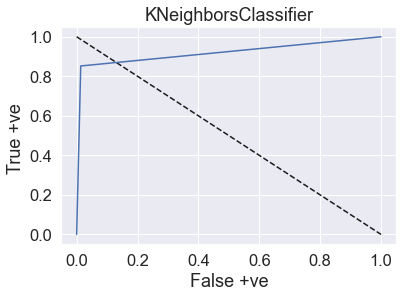

In [213]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.ylabel('True +ve ')
plt.xlabel('False +ve')
plt.title('KNeighborsClassifier')
plt.show()

The true positive rate is calculated as the number of true positives divided by the sum of the number of true positives and the number of false negatives. It describes how good the model is at predicting the positive class when the actual outcome is positive.

As we can see there is very good true +ve rate above 80%... 

# Saving Model:-

In [214]:
import pickle
file = 'avocado_project'
#save file
save = pickle.dump(lr,open(file,'wb'))